# Data Loading

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [3]:
sig = True
zscore = False
cluster = False

In [4]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [5]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

### Relative to Response Onset

Load in S14 Data

In [6]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


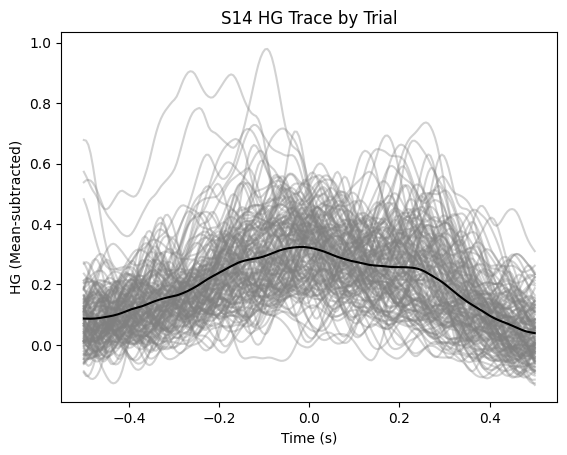

In [7]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(S14_hg_trace, axis=2).T, 'grey', alpha=0.35)
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(np.mean(S14_hg_trace, axis=2), axis=0), 'black')
plt.xlabel('Time (s)')
plt.ylabel('HG (Mean-subtracted)')
plt.title('S14 HG Trace by Trial')
plt.show()

Load in S26 Data

In [8]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


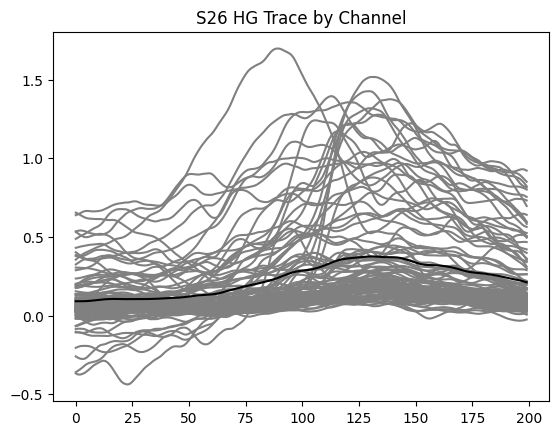

In [9]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [10]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


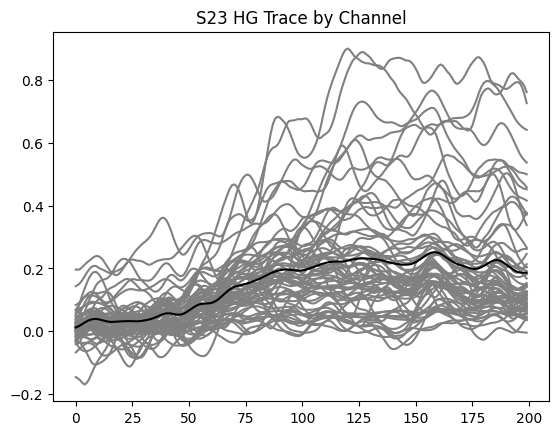

In [11]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [12]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


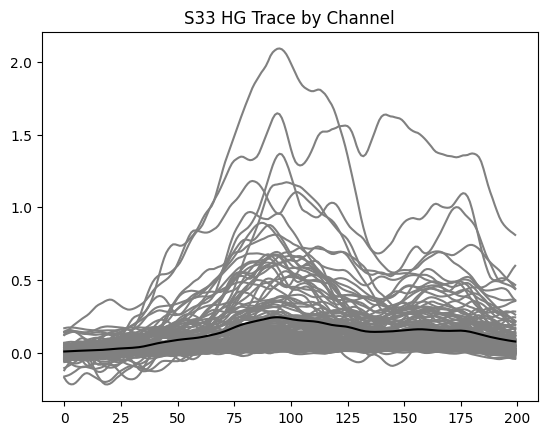

In [13]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

### Relative to Different Phoneme Onsets

In [14]:
from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

S14 Data

In [15]:
S14_hg_data = load_subject_high_gamma_phoneme('S14', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(144, 200, 111) (144, 200, 111) (144, 200, 111)
(144, 8, 16, 200) (144, 8, 16, 200) (144, 8, 16, 200)
(144,) (144,) (144,) (144, 3)


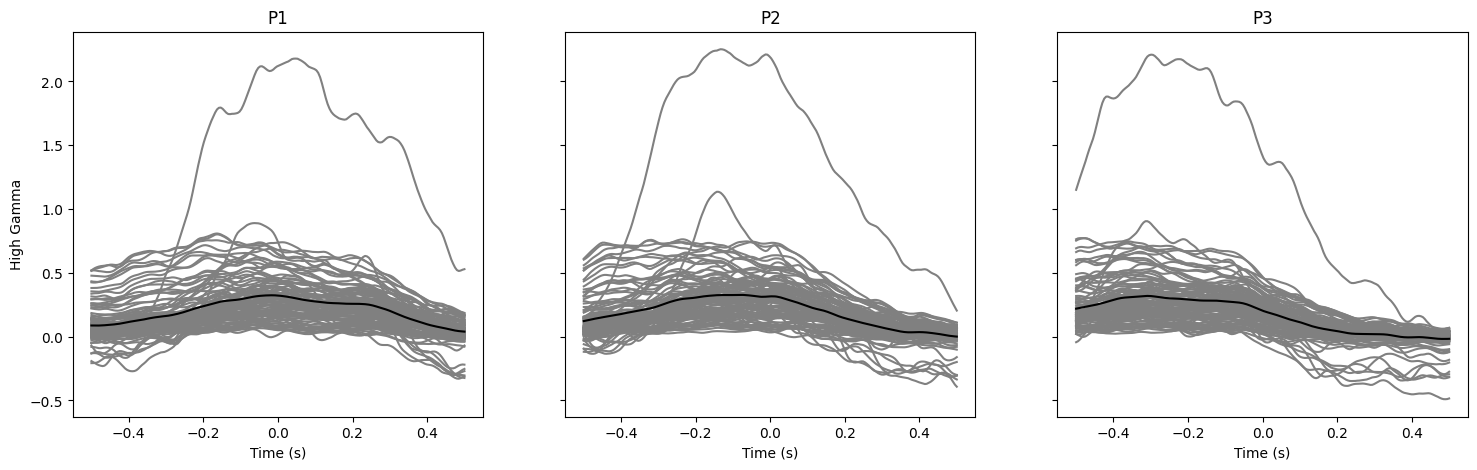

In [16]:
print(S14_hg_data['X1'].shape, S14_hg_data['X2'].shape, S14_hg_data['X3'].shape)
print(S14_hg_data['X1_map'].shape, S14_hg_data['X2_map'].shape, S14_hg_data['X3_map'].shape)
print(S14_hg_data['y1'].shape, S14_hg_data['y2'].shape, S14_hg_data['y3'].shape, S14_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S14_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S14_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S14_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S14_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S14_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S14_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S14_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S26 data

In [17]:
S26_hg_data = load_subject_high_gamma_phoneme('S26', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(148, 200, 111) (148, 200, 111) (148, 200, 111)
(148, 8, 16, 200) (148, 8, 16, 200) (148, 8, 16, 200)
(148,) (148,) (148,) (148, 3)


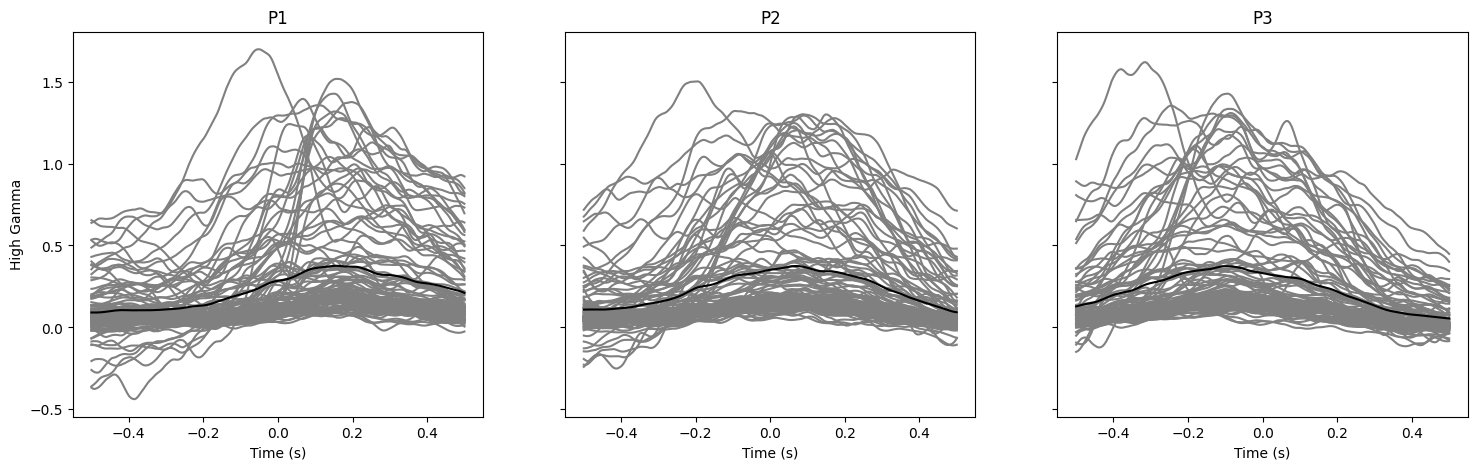

In [18]:
print(S26_hg_data['X1'].shape, S26_hg_data['X2'].shape, S26_hg_data['X3'].shape)
print(S26_hg_data['X1_map'].shape, S26_hg_data['X2_map'].shape, S26_hg_data['X3_map'].shape)
print(S26_hg_data['y1'].shape, S26_hg_data['y2'].shape, S26_hg_data['y3'].shape, S26_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S26_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S26_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S26_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S26_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S26_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S26_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S26_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()


S23 Data

In [19]:
S23_hg_data = load_subject_high_gamma_phoneme('S23', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(151, 200, 63) (151, 200, 63) (151, 200, 63)
(151, 8, 16, 200) (151, 8, 16, 200) (151, 8, 16, 200)
(151,) (151,) (151,) (151, 3)


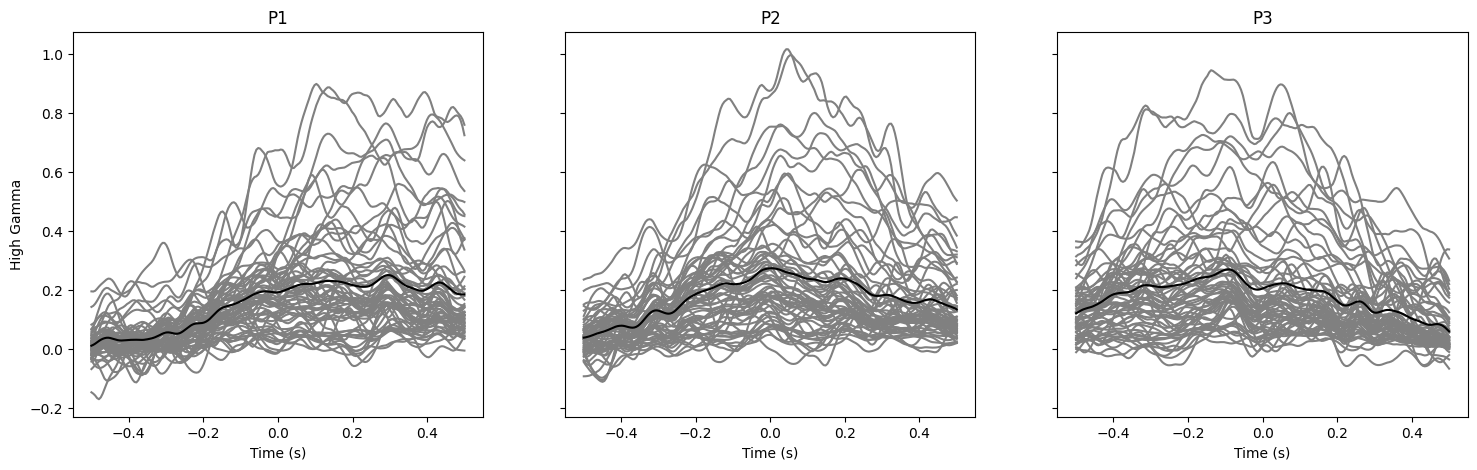

In [20]:
print(S23_hg_data['X1'].shape, S23_hg_data['X2'].shape, S23_hg_data['X3'].shape)
print(S23_hg_data['X1_map'].shape, S23_hg_data['X2_map'].shape, S23_hg_data['X3_map'].shape)
print(S23_hg_data['y1'].shape, S23_hg_data['y2'].shape, S23_hg_data['y3'].shape, S23_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S23_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S23_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S23_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S23_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S23_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S23_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S23_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S33 Data

In [21]:
S33_hg_data = load_subject_high_gamma_phoneme('S33', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(46, 200, 149) (46, 200, 149) (46, 200, 149)
(46, 12, 24, 200) (46, 12, 24, 200) (46, 12, 24, 200)
(46,) (46,) (46,) (46, 3)


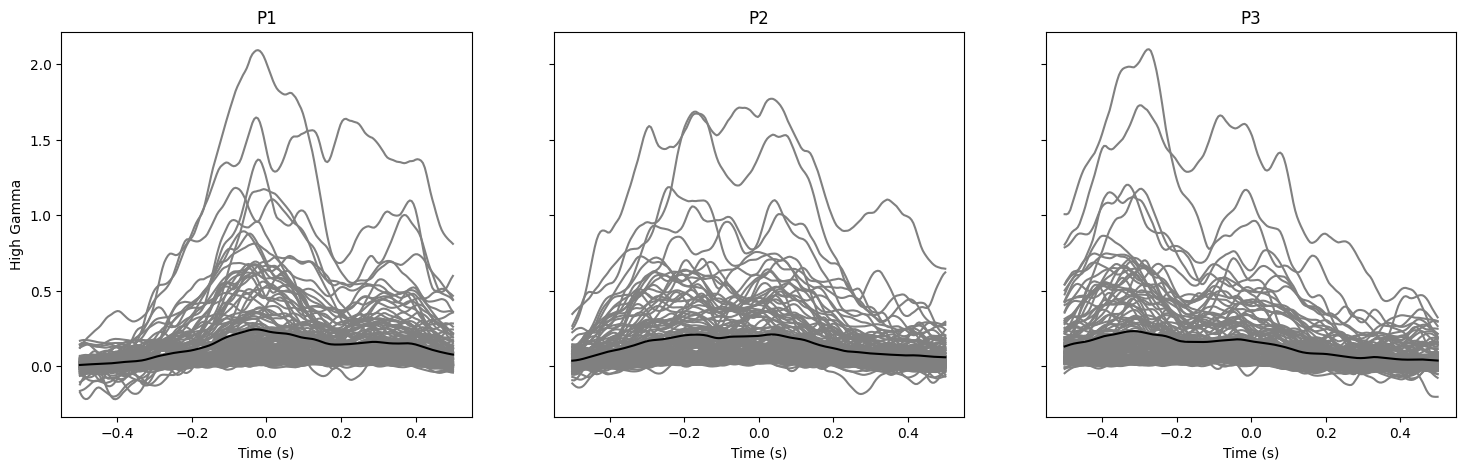

In [22]:
print(S33_hg_data['X1'].shape, S33_hg_data['X2'].shape, S33_hg_data['X3'].shape)
print(S33_hg_data['X1_map'].shape, S33_hg_data['X2_map'].shape, S33_hg_data['X3_map'].shape)
print(S33_hg_data['y1'].shape, S33_hg_data['y2'].shape, S33_hg_data['y3'].shape, S33_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S33_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S33_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S33_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S33_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S33_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S33_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S33_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

In [23]:
S14_artic_labels = phon_to_artic_seq(S14_phon_labels, phon_to_artic_dict)
S26_artic_labels = phon_to_artic_seq(S26_phon_labels, phon_to_artic_dict)
S23_artic_labels = phon_to_artic_seq(S23_phon_labels, phon_to_artic_dict)
S33_artic_labels = phon_to_artic_seq(S33_phon_labels, phon_to_artic_dict)

### Collapse Across Positions

In [24]:
S14_hg_collapsed = np.concatenate((S14_hg_data['X1'], S14_hg_data['X2'], S14_hg_data['X3']), axis=0)
S14_phon_labels_collapsed = np.concatenate((S14_hg_data['y1'], S14_hg_data['y2'], S14_hg_data['y3']), axis=0)

S26_hg_collapsed = np.concatenate((S26_hg_data['X1'], S26_hg_data['X2'], S26_hg_data['X3']), axis=0)
S26_phon_labels_collapsed = np.concatenate((S26_hg_data['y1'], S26_hg_data['y2'], S26_hg_data['y3']), axis=0)

S23_hg_collapsed = np.concatenate((S23_hg_data['X1'], S23_hg_data['X2'], S23_hg_data['X3']), axis=0)
S23_phon_labels_collapsed = np.concatenate((S23_hg_data['y1'], S23_hg_data['y2'], S23_hg_data['y3']), axis=0)

S33_hg_collapsed = np.concatenate((S33_hg_data['X1'], S33_hg_data['X2'], S33_hg_data['X3']), axis=0)
S33_phon_labels_collapsed = np.concatenate((S33_hg_data['y1'], S33_hg_data['y2'], S33_hg_data['y3']), axis=0)

In [25]:
S14_artic_labels_collapsed = phon_to_artic_seq(S14_phon_labels_collapsed, phon_to_artic_dict)
S26_artic_labels_collapsed = phon_to_artic_seq(S26_phon_labels_collapsed, phon_to_artic_dict)
S23_artic_labels_collapsed = phon_to_artic_seq(S23_phon_labels_collapsed, phon_to_artic_dict)
S33_artic_labels_collapsed = phon_to_artic_seq(S33_phon_labels_collapsed, phon_to_artic_dict)

# Joint PCA Decomp Decoding

### Data Preparation

#### Saving pt data as pkl dict to load from

In [26]:
# S14_hg_data['y_full_artic'] = S14_artic_labels
# S26_hg_data['y_full_artic'] = S26_artic_labels
# S23_hg_data['y_full_artic'] = S23_artic_labels
# S33_hg_data['y_full_artic'] = S33_artic_labels

# S14_hg_data['X_collapsed'] = S14_hg_collapsed
# S26_hg_data['X_collapsed'] = S26_hg_collapsed
# S23_hg_data['X_collapsed'] = S23_hg_collapsed
# S33_hg_data['X_collapsed'] = S33_hg_collapsed

# S14_hg_data['y_phon_collapsed'] = S14_phon_labels_collapsed
# S26_hg_data['y_phon_collapsed'] = S26_phon_labels_collapsed
# S23_hg_data['y_phon_collapsed'] = S23_phon_labels_collapsed
# S33_hg_data['y_phon_collapsed'] = S33_phon_labels_collapsed

# S14_hg_data['y_artic_collapsed'] = S14_artic_labels_collapsed
# S26_hg_data['y_artic_collapsed'] = S26_artic_labels_collapsed
# S23_hg_data['y_artic_collapsed'] = S23_artic_labels_collapsed
# S33_hg_data['y_artic_collapsed'] = S33_artic_labels_collapsed


In [27]:
# pt_dict = {}

# # merge pretrain information with pt data
# pt_dict['S14'] = S14_hg_data | {'pre_pts': ['S26', 'S33', 'S23']}
# pt_dict['S26'] = S26_hg_data | {'pre_pts': ['S14', 'S33', 'S23']}
# pt_dict['S23'] = S23_hg_data | {'pre_pts': ['S14', 'S26', 'S33']}
# pt_dict['S33'] = S33_hg_data | {'pre_pts': ['S14', 'S26', 'S23']}

In [28]:
# from utils import save_pkl

# save_pkl(pt_dict, '../data/pt_decoding_data.pkl')

#### Main decoding cell

In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from tqdm.notebook import tqdm

from alignment_methods import JointPCADecomp, CCAAlign
import utils

# patient and target params
pt = 'S14'
p_ind = 1

# experiment params
pool_pre = True
tar_in_train = True
cca_algn = False
joint_dim_red = True

# constant params
n_iter = 50
n_folds = 5
n_comp = 30

# alignment label type
# algn_type = 'artic_seq'
algn_type = 'phon_seq'
algn_grouping = 'class'

# decoding label type
lab_type = 'phon'
# lab_type = 'artic'

# dimensionality reduction type
red_method = 'PCA'
dim_red = PCA

# decoding run filename
filename_suffix = 'new_joint_pca_pt-specific'
filename = f'../acc_data/joint_algn_accs/{pt}_{"p" if lab_type == "phon" else "a"}{"All" if p_ind == -1 else p_ind}_{filename_suffix}.pkl'

# load data
pt_data = utils.load_pkl('../data/pt_decoding_data.pkl')
tar_data, pre_data = utils.decoding_data_from_dict(pt_data, pt, p_ind,
                                                   lab_type=lab_type,
                                                   algn_type=algn_type)
D_tar, lab_tar, lab_tar_full = tar_data
D1, lab1, lab1_full = pre_data[0]
D2, lab2, lab2_full = pre_data[1]
D3, lab3, lab3_full = pre_data[2]

iter_accs = []
wrong_trs_iter = []
y_true_iter, y_pred_iter = [], []
for _ in tqdm(range(n_iter)):
    y_true_all, y_pred_all = [], []
    wrong_trs_fold = []
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    for train_idx, test_idx in cv.split(D_tar, lab_tar):
        X1, X2, X3 = D1, D2, D3
        y1, y2, y3 = lab1, lab2, lab3
        y1_full, y2_full, y3_full = lab1_full, lab2_full, lab3_full
        
        # split target data into train and test
        X_tar_train, X_tar_test = D_tar[train_idx], D_tar[test_idx]
        y_tar_train, y_tar_test = lab_tar[train_idx], lab_tar[test_idx]
        y_tar_full_train, y_tar_full_test = (lab_tar_full[train_idx],
                                             lab_tar_full[test_idx])

        # learn joint PCA decomposition from full label sequences
        if joint_dim_red:
            jointPCA = JointPCADecomp(n_components=n_comp)
            X1, X2, X3, X_tar_train = jointPCA.fit_transform([X1, X2, X3,
                                                            X_tar_train],
                                                            [y1_full, y2_full,
                                                            y3_full,
                                                            y_tar_full_train])
            # apply target transformation to test data
            X_tar_test = jointPCA.transform(X_tar_test, idx=3)
        else:  # apply separate dimensionality reduction to each dataset
            X1_p, X2_p, X3_p, X_tar_train_p, X_tar_test_p = (
                                    [X.reshape(-1, X.shape[-1]) for X in
                                     (X1, X2, X3, X_tar_train, X_tar_test)])
            X1_p, X2_p, X3_p = [dim_red(n_components=n_comp).fit_transform(X)
                                for X in [X1_p, X2_p, X3_p]]
            tar_dr = dim_red(n_components=n_comp)
            X_tar_train_p = tar_dr.fit_transform(X_tar_train_p)
            X_tar_test_p = tar_dr.transform(X_tar_test_p)
            X1, X2, X3, X_tar_train, X_tar_test = [X.reshape(Xs.shape[0], -1,
                                                             n_comp)
                                                   for (X, Xs) in
                                                   zip((X1_p, X2_p, X3_p,
                                                        X_tar_train_p,
                                                        X_tar_test_p),
                                                       (X1, X2, X3,
                                                        X_tar_train,
                                                        X_tar_test))]

        # align each pooled patient data to target data with CCA
        if cca_algn:
            cca1 = CCAAlign(type=algn_grouping)
            cca2 = CCAAlign(type=algn_grouping)
            cca3 = CCAAlign(type=algn_grouping)
            cca1.fit(X_tar_train, X1, y_tar_full_train, y1_full)
            cca2.fit(X_tar_train, X2, y_tar_full_train, y2_full)
            cca3.fit(X_tar_train, X3, y_tar_full_train, y3_full)
            X1 = cca1.transform(X1)
            X2 = cca2.transform(X2)
            X3 = cca3.transform(X3)

        # reshape to trials x features
        X_tar_train = X_tar_train.reshape(X_tar_train.shape[0], -1)
        X_tar_test = X_tar_test.reshape(X_tar_test.shape[0], -1)
        X1 = X1.reshape(X1.shape[0], -1)
        X2 = X2.reshape(X2.shape[0], -1)
        X3 = X3.reshape(X3.shape[0], -1)

        if not pool_pre:
            X_train, y_train = X_tar_train, y_tar_train
        else:
            if not tar_in_train:
                X_train = np.concatenate((X1, X2, X3), axis=0)
                y_train = np.concatenate((y1, y2, y3), axis=0)
            else:
                X_train = np.concatenate((X_tar_train, X1, X2, X3), axis=0)
                y_train = np.concatenate((y_tar_train, y1, y2, y3), axis=0)
                # X_train = np.concatenate((X_tar_train, X1, X2), axis=0)  # no S23
                # y_train = np.concatenate((y_tar_train, y1, y2), axis=0)  # no S23
        X_test = X_tar_test
        y_test = y_tar_test

        # sc = MinMaxScaler()
        # X_train = sc.fit_transform(X_train)
        # X_test = sc.transform(X_test)

        clf = BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                n_estimators=10)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        wrong_idxs = np.where(y_test != y_pred)[0]
        wrong_trs_fold.extend(test_idx[wrong_idxs])

    y_true_iter.append(y_true_all)
    y_pred_iter.append(y_pred_all)
    wrong_trs_iter.append(wrong_trs_fold)
    bal_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    print(bal_acc)
    iter_accs.append(bal_acc)

out_data = {}
out_data['y_true'] = y_true_iter
out_data['y_pred'] = y_pred_iter
out_data['wrong_trs'] = wrong_trs_iter
out_data['accs'] = iter_accs
out_data['params'] = {'pt': pt, 'p_ind': p_ind, 'pool_pre': pool_pre,
                      'tar_in_train': tar_in_train, 'cca_algn': cca_algn,
                      'joint_dim_red': joint_dim_red, 'n_iter': n_iter,
                      'n_folds': n_folds, 'n_comp': n_comp,
                      'algn_type': algn_type, 'algn_grouping': algn_grouping,
                      'lab_type': lab_type, 'red_method': red_method,
                      'dim_red': dim_red}
utils.save_pkl(out_data, filename)


print(iter_accs)
print(f'Mean acc: {np.mean(iter_accs)}, Std: {np.std(iter_accs)}')
print()    


  0%|          | 0/50 [00:00<?, ?it/s]

0.4512788953965425
0.49260461760461755
0.47294230823642586
0.4638216902922785
0.4521736977619331
0.4565946580652463
0.4634368899074781
0.4675671278612455
0.4753840930311518
0.4574116515292985
0.46667727697139466
0.5072312763489234
0.46180785445491324
0.4538465891407067
0.479580822227881
0.4604122457063633
0.4743739920210508


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cmat = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=phon_labels)
disp.plot(cmap='Reds')
plt.show()

In [ ]:
np.mean(utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_sep_pca_pooled_ccaAligned.pkl')['accs'])

0.5251346376934611

# Decoding Results

In [ ]:
p1_S14_tar = np.zeros((6, 50))
p1_S14_tar[0,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_sep_pca_pt-specific.pkl')['accs']
p1_S14_tar[1,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_joint_pca_pt-specific.pkl')['accs']
p1_S14_tar[2,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_sep_pca_pooled_unaligned.pkl')['accs']
p1_S14_tar[3,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_joint_pca_pooled_unaligned.pkl')['accs']
p1_S14_tar[4,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_sep_pca_pooled_ccaAligned.pkl')['accs']
p1_S14_tar[5,:] = utils.load_pkl('../acc_data/joint_algn_accs/S14_p1_joint_pca_pooled_ccaAligned.pkl')['accs']


In [ ]:
def set_box_colors(bp, colors):
    for i in range(len(colors)):
        plt.setp(bp['boxes'][i], color=colors[i])
        plt.setp(bp['caps'][2*i], color=colors[i])
        plt.setp(bp['caps'][2*i + 1], color=colors[i])
        plt.setp(bp['whiskers'][2*i], color=colors[i])
        plt.setp(bp['whiskers'][2*i+1], color=colors[i])
        # plt.setp(bp['fliers'][i], color=colors[i])
        # plt.setp(bp['fliers'][2*i+1], color=colors[i])
        plt.setp(bp['medians'][i], color=colors[i])

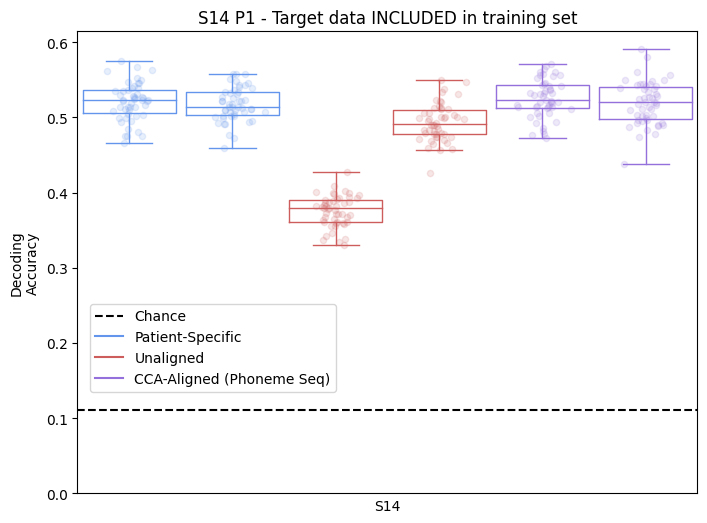

In [ ]:
import seaborn as sns

box_width = 0.9
sc_alpha = 0.15
sc_jitter = 0.1
spacing = 2
n_tar = 6
# n_no_tar = pAll_accs.shape[1] - n_tar
# n_no_tar = 5
# tar_colors = ['cornflowerblue', 'indianred', 'mediumpurple', 'darkorange']
tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred', 'mediumpurple', 'mediumpurple']
# no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen', 'darkorange', 'cornflowerblue']
no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen']

f, ax1 = plt.subplots(1, 1, figsize=(8, 6))
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
b1 = ax1.boxplot(list(p1_S14_tar), positions=range(n_tar), widths=box_width, sym='')
set_box_colors(b1, tar_colors)
for i in range(n_tar):
    x = np.random.normal(i, sc_jitter, size=len(p1_S14_tar[i,:]))
    ax1.scatter(x, p1_S14_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax1.boxplot(list(pAll_S26_tar), positions=range(n_tar + spacing, 2*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+(n_tar+spacing), sc_jitter, size=len(pAll_S26_tar[i,:]))
#     ax1.scatter(x, pAll_S26_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b3 = ax1.boxplot(list(pAll_S23_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b3, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S23_tar[i,:]))
#     ax1.scatter(x, pAll_S23_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax1.boxplot(list(pAll_S33_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S33_tar[i,:]))
#     ax1.scatter(x, pAll_S33_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)

ax1.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax1.axhline(1/4, color='black', linestyle='--', label='Chance')
ax1.set_ylim(bottom=0)
ax1.set_xlabel('S14')
ax1.set_ylabel('Decoding\nAccuracy')
# ax1.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2, 7*(n_tar+spacing)/2-n_tar/2])
# ax1.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2])
ax1.set_xticks([])
# ax1.set_xticklabels(['S14', 'S26', 'S33'])
ax1.set_title('S14 P1 - Target data INCLUDED in training set')

# legend creation
a = ax1.plot([], c=tar_colors[0], label='Patient-Specific')
b = ax1.plot([], c=tar_colors[2], label='Unaligned')
c = ax1.plot([], c=tar_colors[4], label='CCA-Aligned (Phoneme Seq)')
# d = ax1.plot([], c=tar_colors[3], label='Aligned (Articulator Seq)')
# ax1.legend(loc=[0.6, 0.04])
ax1.legend(loc=[0.02, 0.22])
# ax1.legend()


# b1 = ax2.boxplot(list(pAll_S14_no_tar), positions=range(n_no_tar), widths=box_width, sym='')
# set_box_colors(b1, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i, sc_jitter, size=len(pAll_S14_no_tar[i,:]))
#     ax2.scatter(x, pAll_S14_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax2.boxplot(list(pAll_S26_no_tar), positions=range(n_no_tar + spacing, 2*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+(n_no_tar+spacing), sc_jitter, size=len(pAll_S26_no_tar[i,:]))
#     ax2.scatter(x, pAll_S26_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# # b3 = ax2.boxplot(list(pAll_S23_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# # set_box_colors(b3, no_tar_colors)
# # for i in range(n_no_tar):
# #     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S23_no_tar[i,:]))
# #     ax2.scatter(x, pAll_S23_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax2.boxplot(list(pAll_S33_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S33_no_tar[i,:]))
#     ax2.scatter(x, pAll_S33_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)

# # ax2.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax2.axhline(1/4, color='black', linestyle='--', label='Chance')
# ax2.set_ylim(bottom=0)
# ax2.set_xlabel('Target Patient')
# # ax2.set_ylabel('Decoding\nAccuracy')
# # ax2.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# # ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2, 7*(n_no_tar+spacing)/2-n_no_tar/2])
# # ax2.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2])
# ax2.set_xticklabels(['S14', 'S26', 'S33'])
# ax2.set_title('Target data EXCLUDED from training set')

# # legend creation
# a = ax2.plot([], c=no_tar_colors[0], label='Unaligned')
# b = ax2.plot([], c=no_tar_colors[1], label='Aligned (Phoneme Seq)')
# c = ax2.plot([], c=no_tar_colors[2], label='PS-Aligned to Random')
# # d = ax2.plot([], c=no_tar_colors[3], label='Aligned (Articulator Seq)')
# # e = ax2.plot([], c=no_tar_colors[4], label='AS Aligned to Random')
# # ax2.legend(loc=[0.46, 0.7])
# # ax2.legend(loc=[0.5, 0.78])
# ax2.legend()

# # plt.suptitle('All positions Phoneme Decoding with Cross-Patient CCA Alignment (no S23)')
# plt.suptitle('Position 3 Articulator Decoding with Cross-Patient CCA Alignment')
# plt.subplots_adjust(wspace=0.05)
plt.show()

# New Section